In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
train_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train"
valid_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\val"

In [3]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [9]:
train_gen = train_datagen.flow_from_directory(
                                train_path,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [10]:
val_gen = train_datagen.flow_from_directory(
                                train_path,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [14]:
test_gen = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 984 images belonging to 10 classes.


In [15]:
cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [17]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [18]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [20]:
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    steps_per_epoch = 7000/32,
                    epochs = 100,
                    validation_steps = 3000/32,
                    validation_data = val_gen) 

Epoch 1/100
218/218 [==============================] - 141s 610ms/step - loss: 2.0273 - accuracy: 0.2400 - val_loss: 1.7985 - val_accuracy: 0.3500
Epoch 2/100
218/218 [==============================] - 60s 273ms/step - loss: 1.4021 - accuracy: 0.4886 - val_loss: 1.1840 - val_accuracy: 0.5757
Epoch 3/100
218/218 [==============================] - 60s 276ms/step - loss: 1.0809 - accuracy: 0.6123 - val_loss: 1.0167 - val_accuracy: 0.6283
Epoch 4/100
218/218 [==============================] - 60s 275ms/step - loss: 0.8629 - accuracy: 0.6831 - val_loss: 0.7077 - val_accuracy: 0.7447
Epoch 5/100
218/218 [==============================] - 60s 274ms/step - loss: 0.7368 - accuracy: 0.7337 - val_loss: 0.8743 - val_accuracy: 0.6637
Epoch 6/100
218/218 [==============================] - 61s 277ms/step - loss: 0.6499 - accuracy: 0.7659 - val_loss: 0.5742 - val_accuracy: 0.7923
Epoch 7/100
218/218 [==============================] - 58s 263ms/step - loss: 0.5665 - accuracy: 0.7910 - val_loss: 0.6616 

Epoch 57/100
218/218 [==============================] - 60s 272ms/step - loss: 0.0811 - accuracy: 0.9723 - val_loss: 0.2122 - val_accuracy: 0.9367
Epoch 58/100
218/218 [==============================] - 60s 275ms/step - loss: 0.0836 - accuracy: 0.9690 - val_loss: 0.1631 - val_accuracy: 0.9463
Epoch 59/100
218/218 [==============================] - 62s 281ms/step - loss: 0.0778 - accuracy: 0.9741 - val_loss: 0.2686 - val_accuracy: 0.9207
Epoch 60/100
218/218 [==============================] - 62s 285ms/step - loss: 0.0896 - accuracy: 0.9703 - val_loss: 0.1638 - val_accuracy: 0.9513
Epoch 61/100
218/218 [==============================] - 61s 278ms/step - loss: 0.0812 - accuracy: 0.9727 - val_loss: 0.2355 - val_accuracy: 0.9257
Epoch 62/100
218/218 [==============================] - 62s 282ms/step - loss: 0.0771 - accuracy: 0.9737 - val_loss: 0.1899 - val_accuracy: 0.9430
Epoch 63/100
218/218 [==============================] - 61s 279ms/step - loss: 0.0853 - accuracy: 0.9701 - val_loss: 0

In [21]:
scores = cnn.evaluate(test_gen)

31/31 [==============================] - 13s 405ms/step - loss: 0.3172 - accuracy: 0.9289


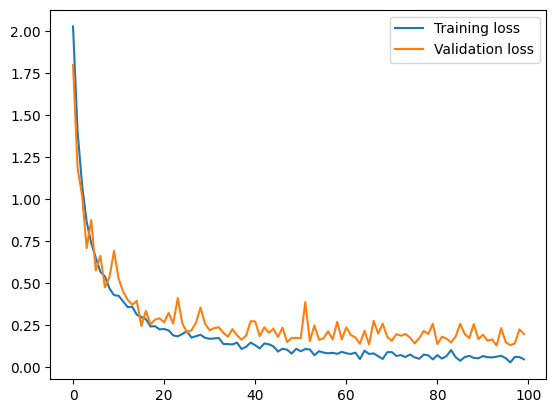

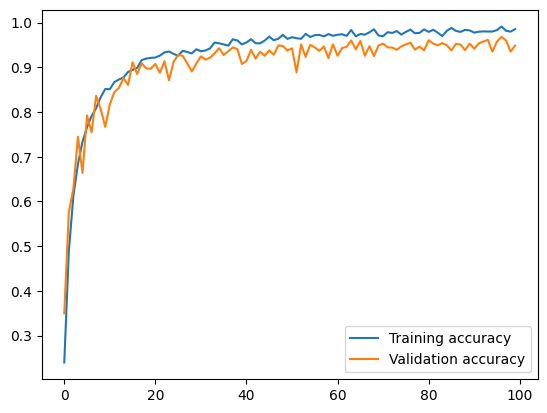

In [22]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [23]:
cnn.save('cnn.h5')

In [29]:
import math
test_steps_per_epoch = math.ceil(test_gen.samples / test_gen.batch_size)

In [30]:
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

31/31 [==============================] - 6s 184ms/step


In [33]:
predictions[1]

array([9.9668914e-01, 6.0261285e-04, 9.1766460e-06, 1.5571530e-04,
       3.8375612e-04, 1.3220072e-06, 1.8613475e-03, 2.9644123e-04,
       2.9891658e-07, 1.4754268e-07], dtype=float32)

In [34]:
predicted_classes = np.argmax(predictions,axis=1)

In [35]:
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [36]:
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

[[98  0  0  1  0  0  0  1  0  0]
 [ 0 84  3  1 11  0  0  1  0  0]
 [ 0  0 87  5  7  0  0  1  0  0]
 [ 0  0  0 96  2  0  0  0  1  1]
 [ 0  0  3  3 94  0  0  0  0  0]
 [ 0  0  0  1  0 80  2  0  0  1]
 [ 0  3  0  2 10  4 81  0  0  0]
 [ 2  1  0  0  0  0  0 97  0  0]
 [ 0  1  0  0  1  0  0  0 98  0]
 [ 0  0  1  2  1  0  0  0  0 96]]


In [37]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.98      0.98      0.98       100
                        Tomato___Early_blight       0.94      0.84      0.89       100
                         Tomato___Late_blight       0.93      0.87      0.90       100
                           Tomato___Leaf_Mold       0.86      0.96      0.91       100
                  Tomato___Septoria_leaf_spot       0.75      0.94      0.83       100
Tomato___Spider_mites Two-spotted_spider_mite       0.95      0.95      0.95        84
                         Tomato___Target_Spot       0.98      0.81      0.89       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.97      0.97       100
                 Tomato___Tomato_mosaic_virus       0.99      0.98      0.98       100
                             Tomato___healthy       0.98      0.96      0.97       100

                                     accu